## 卷积神经网络模型构建与应用实验（学生补充）
### CIFAR-10卷积神经网络

### 1.导入相关库

In [13]:
# !pip install tensorflow
import numpy as np
import tensorflow as tf  
from tensorflow.keras.datasets import cifar10  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  
from tensorflow.keras.utils import to_categorical  
import matplotlib.pyplot as plt
import datetime

### 2.加载CIFAR-10数据集，构建训练集和测试集  

In [14]:
np.random.seed(0)
 
(X_train, y_train), (X_test, y_test) =  cifar10.load_data() #从TensorFlow内置的数据源中自动下载数据集

In [15]:
# # 本地已有CIFAR-10数据集，加载训练集和测试集（如能自动下载数据集，则无须下述代码，可删除）
# import os
# import pickle
# import numpy as np
# def load_cifar_10_data(data_dir):
#     train_images, train_labels = [], []
#     # 循环加载
#     for i in range(1, 6):
#         data_path = os.path.join(data_dir, f'data_batch_{i}')
#         with open(data_path, 'rb') as file:
#             data = pickle.load(file, encoding='bytes')
#             images = data[b'data']
#             labels = data[b'labels']
#             images = images.reshape((len(images), 3, 32, 32)).transpose(0, 2, 3, 1)
#             train_images.append(images)
#             train_labels.extend(labels)
#     train_images = np.vstack(train_images)
#     train_labels = np.array(train_labels).reshape(-1, 1)
#     # 加载测试集
#     test_images, test_labels = [], []
#     test_data_path = os.path.join(data_dir, 'test_batch')
#     with open(test_data_path, 'rb') as file:
#         data = pickle.load(file, encoding='bytes')
#         test_images = data[b'data']
#         test_labels = data[b'labels']
#         test_images = test_images.reshape((len(test_images), 3, 32, 32)).transpose(0, 2, 3, 1)
#     test_labels = np.array(test_labels).reshape(-1, 1)
#     return (train_images, train_labels), (test_images, test_labels)
# # 指定本地CIFAR-10数据集的路径
# cifar_10_data_dir = 'E:/note/ch5/CIFAR-10_data/data'
# (train_x,train_y),(test_x,test_y) = load_cifar_10_data(cifar_10_data_dir)

#### 显示训练集某张图片

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

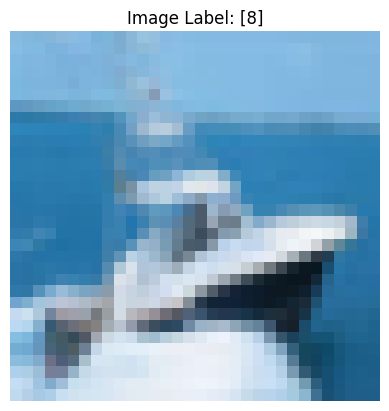

In [16]:
# 选择一张图片来显示，比如训练集中的第一张图片  
image_index = 8 
image = X_train[image_index]  
label = y_train[image_index]  
# 将图像数据转换为uint8类型以用于显示  
image_to_display = np.uint8(image)    
# 使用matplotlib显示图片   
plt.imshow(image_to_display)  # CIFAR-10图片是彩色的，所以不需要cmap='gray'   
plt.title(f'Image Label: {label}')  
plt.axis('off')  # 关闭坐标轴显示  
plt.show()  # 显示图片

### 3.数据预处理

#### （1）原来的形状四维数组(50000, 32, 32, 3)——(batch_size, height, width, channels)：batch_size使用批次训练而不是单个样本训练可以加快训练速度

In [17]:
# 已经是卷积层需要的格式
print(np.shape(X_train))
print(np.shape(X_test))

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#### （2）数据归一化：归一化图像数据到0-1范围 

In [18]:
X_train = X_train / 255
X_test = X_test / 255

#### （3）将标签转换为独热编码（one-hot编码）

In [19]:
print(y_test.shape)
y_train = to_categorical(y_train) # 转化为独热编码
y_test = to_categorical(y_test)
print(y_test.shape)
num_classes = y_test.shape[1] # 10

(10000, 1)
(10000, 10)


### 4.构建卷积神经网络CNN模型

In [20]:
model = Sequential([
    # 定义了一个二维卷积层（Conv2D）。有32个卷积核，每个卷积核的大小是5x5。输入数据的形状被指定为28x28像素的单通道图像。使用relu激活函数
    Conv2D(filters=32, kernel_size=(5, 5), input_shape=(32, 32, 3), activation='relu'),
    # 定义了一个最大池化层（MaxPooling2D）。将每个2x2的区域中的最大值作为输出。
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=8, kernel_size=(3, 3),  activation='relu'),
    # 定义了一个最大池化层（MaxPooling2D）。将每个2x2的区域中的最大值作为输出。
    MaxPooling2D(pool_size=(2, 2)),
    # 添加了一个丢弃层（Dropout），在训练过程中随机忽略（设置为0）20%的输入单元
    Dropout(0.3),
    # 将卷积和池化层产生的多维输出展平，以连接到全连接层
    Flatten(),
    # 定义了一个全连接层（Dense），有128个神经元，使用relu作为激活函数
    Dense(256, activation='relu'),
    # 定义了输出层，的神经元数量等于类别数（num_classes为10），使用softmax激活函数
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,026 (168.07 KB)

 Trainable params: 43,026 (168.07 KB)

 Non-trainable params: 0 (0.00 B)

### 5.编译模型（配置优化器、损失函数和评估指标）

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 6.训练模型和评估模型

In [22]:
startdate = datetime.datetime.now() # 获取当前时间
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
enddate = datetime.datetime.now()
print("训练用时：" + str(enddate - startdate))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)  
print('\nTest accuracy:', test_acc)

Epoch 1/20
250/250 - 7s - 27ms/step - accuracy: 0.2959 - loss: 1.9172 - val_accuracy: 0.4360 - val_loss: 1.5803
Epoch 2/20
250/250 - 6s - 23ms/step - accuracy: 0.4312 - loss: 1.5651 - val_accuracy: 0.5011 - val_loss: 1.3874
Epoch 3/20
250/250 - 6s - 22ms/step - accuracy: 0.4836 - loss: 1.4366 - val_accuracy: 0.5247 - val_loss: 1.3289
Epoch 4/20
250/250 - 6s - 23ms/step - accuracy: 0.5072 - loss: 1.3758 - val_accuracy: 0.5408 - val_loss: 1.2903
Epoch 5/20
250/250 - 6s - 23ms/step - accuracy: 0.5229 - loss: 1.3364 - val_accuracy: 0.5536 - val_loss: 1.2344
Epoch 6/20
250/250 - 10s - 40ms/step - accuracy: 0.5339 - loss: 1.2963 - val_accuracy: 0.5643 - val_loss: 1.2064
Epoch 7/20
250/250 - 6s - 23ms/step - accuracy: 0.5506 - loss: 1.2612 - val_accuracy: 0.5814 - val_loss: 1.1741
Epoch 8/20
250/250 - 6s - 23ms/step - accuracy: 0.5616 - loss: 1.2352 - val_accuracy: 0.5929 - val_loss: 1.1542
Epoch 9/20
250/250 - 10s - 40ms/step - accuracy: 0.5737 - loss: 1.2025 - val_accuracy: 0.5985 - val_los

### 7.预测模型，并输出图像的实际类别与预测类别

In [23]:
# 预测测试集图片的类别  
predictions_probs = model.predict(X_test)  # 获取概率分布  
predictions_classes = np.argmax(predictions_probs, axis=1)  # 获取最高概率的类别索引
print(predictions_classes)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[5 8 8 ... 5 1 7]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/tmp/ipykernel_4759/3253945142.py:28: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  plt.tight_layout()  # 调整子图之间的间距
/tmp/ipykernel_4759/3253945142.py:28: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missi

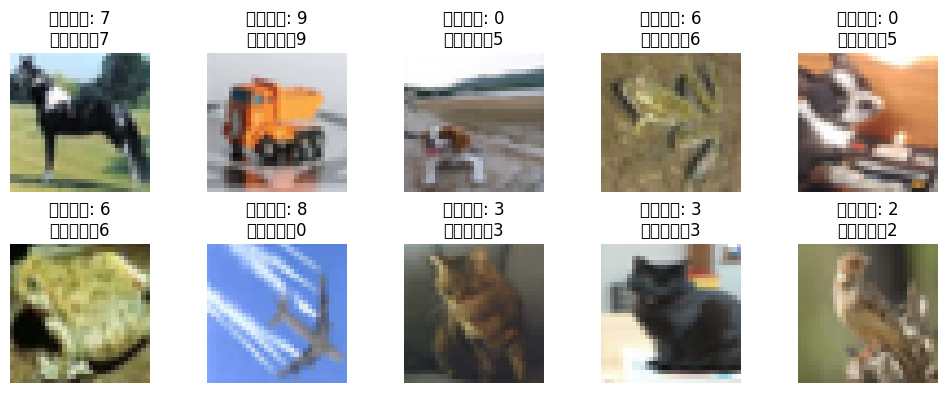

In [24]:
# 设置要展示的图片数量  
num= 10 
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用于正常显示中文标签  
# 初始化图形  
plt.figure(figsize=(10, 4))  # 设置图形大小以适应2行5列的布局  
  
# 循环遍历索引，并显示每张图片的预测结果  
for i in range(num):  
    # 随机选择一个索引  
    index = np.random.randint(0, len(X_test))  
      
    # 获取第i张图片的特征  
    image = X_test[index]    
    # 使用模型进行预测  
    prediction_probs = model.predict(np.array([image]))  
    prediction_class = np.argmax(prediction_probs)  
      
    # 将实际类别的独热编码转换回原始标签  
    actual_class = np.argmax(y_test[index])  
      
    # 设置子图位置并显示图片  
    plt.subplot(2, 5, i+1)  
    plt.imshow(image.reshape(32, 32, 3))  # 假设每张图片的形状是(28, 28, 1)  
    plt.title(f'预测类别: {prediction_class}\n实际类别：{actual_class}')  
    plt.axis('off')  # 关闭坐标轴  
  
# 显示整个图形  
plt.tight_layout()  # 调整子图之间的间距  
plt.show()